# Name: Rakshanda Hedawoo
# Course: BUDT704
# Section: MB0501
# Date: 09/20/2023

# Welcome to the Tom & Jerry card game! 


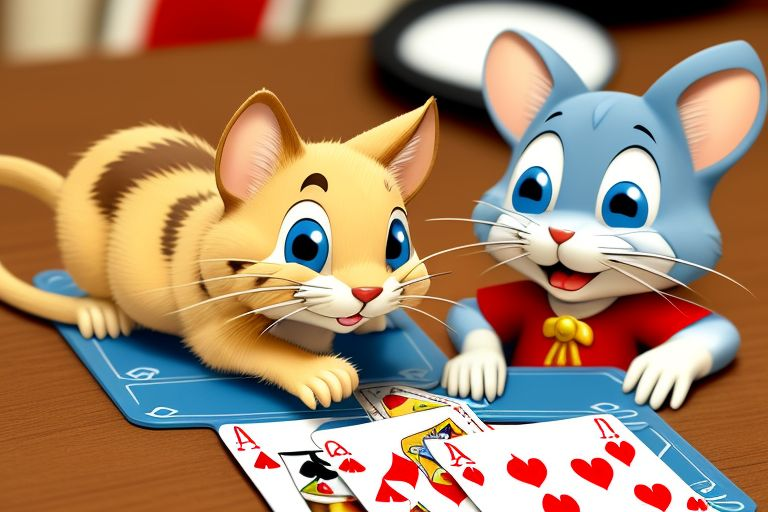

As we are considering only 36 cards in the deck let's build our deck first

In [1]:
#Building the card deck
def build_card_deck():
    deck = [2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10]
    return deck

card_deck = build_card_deck()
print('The initial deck for the game is as follows:')
print(card_deck)

The initial deck for the game is as follows:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [2]:
#Determining the total number of points available in the initial deck
initial_total_points = sum(card_deck)
print('Total number of points available at the begining are:',initial_total_points)

Total number of points available at the begining are: 216


Now lets distribute the deck among Tom and Jerry. We will be using choice function from the random library to randomly distribute the cards to our players. 

In [3]:
import random
def distribute_cards(deck):
    player1 = []
    player2 = []
    number_of_cards = int(len(deck)/2)
    for card in range(number_of_cards):
        item = random.choice(deck)  #randomly choosing a card from the main deck
        player1.append(item) #assigning that card to player 1
        deck.remove(item) #removing that card from the main deck
        
        #repeating the same for player 2
        item = random.choice(deck)
        player2.append(item)
        deck.remove(item)
        
    return (player1 , player2)
    

*Lets have a look what cards Tom and Jerry are dealing with...*

In [4]:
#Distributing the cards
tom_cards, jerry_cards = distribute_cards(card_deck)

print('Tom has the following cards in his hand: ',tom_cards)
print('Jerry has the following cards in his hands: ',jerry_cards)
print('Total number of cards Tom has: ',len(tom_cards))
print('Total number of cards Jerry has: ',len(jerry_cards))
print('Total points dealt to Tom are: ',sum(tom_cards))
print('Total points dealt to Jerry are: ',sum(jerry_cards))

Tom has the following cards in his hand:  [4, 10, 3, 8, 7, 8, 8, 3, 9, 10, 4, 5, 7, 3, 2, 3, 6, 6]
Jerry has the following cards in his hands:  [6, 7, 9, 10, 6, 2, 8, 5, 9, 2, 9, 4, 5, 7, 4, 10, 5, 2]
Total number of cards Tom has:  18
Total number of cards Jerry has:  18
Total points dealt to Tom are:  106
Total points dealt to Jerry are:  110


**Now let's have a look at the rules:**
1) Tom and Jerry will start the game by showing their first two cards in the first round.

2) Now both of them will add the value on their cards and tell us the addition for the same.

3) If Tom has the less value as compared to Jerry, then Tom wins the round and vice-versa.

4) If Tom won, he will give his two cards to Jerry as a penalty and vice-versa.

5) If there is a tie, both of them will draw two more cards and compare their sum, and who ever looses this round receives all the penalty cards from the previous and the current rounds too. This continues untill the tie is broken or one player runs out of cards.

6) The game will end if either Tom or Jerry run out of cards to complete the current round or total 50 rounds are done, whichever comes first.

7) If Tom is not able to complete the last game, Jerry will return the cards he received from Tom in the previous round and vice-versa.

8) Now whoever has the lowest sum of the value on their cards wins the game.

# Let the game begin!

In [5]:
#This function simulates a single card game

def play_single_round_card_game(player1_cards, player2_cards):
    number_of_rounds = 50
    current_round = 1
    player1_onhold_cards = []
    player2_onhold_cards = []
    print('Tom\'s initial cards are: ',player1_cards)
    print('Jerry\'s initial cards are: ',player2_cards)
    
    while((len(player1_cards) > 1 and len(player2_cards) > 1) and current_round <= number_of_rounds):   
        print(f'------------------Round {current_round}--------------------')
        
        #player drawing two cards
        draw_cards_player1 = player1_cards[0:2]
        draw_cards_player2 = player2_cards[0:2]
        print('Tom drew the following cards: ',draw_cards_player1)
        print('Jerry drew the following cards: ',draw_cards_player2)
        
        #Determining the winner for the current round
        sum_player1 = sum(draw_cards_player1)
        sum_player2 = sum(draw_cards_player2)
        print('Tom\'s total points: ',sum_player1)
        print('Jerry\'s total points: ',sum_player2)

        if(sum_player1 < sum_player2):
            print(f'Tom wins round {number_of_rounds}!')
            #adding the penalty cards to Jerry's deck
            player2_cards += map(lambda value: value, draw_cards_player2)
            player2_cards += map(lambda value: value, draw_cards_player1)
            del(player2_cards[0:2])
            del(player1_cards[0:2])
            
        elif(sum_player2 < sum_player1):
            print(f'Jerry wins round {number_of_rounds}!')
            #adding the penalty cards to Tom's deck
            player1_cards += map(lambda value: value, draw_cards_player1)
            player1_cards += map(lambda value: value, draw_cards_player2)
            del(player1_cards[0:2])
            del(player2_cards[0:2])
            
        else:
            print('It\'s a tie')
            #in case of a tie next set of cards are pulled and current round's cards are kept on hold
            player1_onhold_cards += draw_cards_player1
            player2_onhold_cards += draw_cards_player2
            del(player1_cards[0:2])
            del(player2_cards[0:2])
            
            print('Cards kept on hold are: ',player1_onhold_cards,player2_onhold_cards)
            print('Tom is left with these many cards: ',player1_cards)
            print('Jerry is left with these many cards: ',player2_cards)

            #Going to the next round
            current_round = current_round + 1
            continue
            
            
        #When the tie breaks the cards kept on hold are given to the player who lost the round
        if(len(player1_onhold_cards) > 0 and len(player2_onhold_cards) > 0):
            if(sum(player1_cards) < sum(player2_cards)):
                player2_cards += map(lambda value: value, player1_onhold_cards)
                player2_cards += map(lambda value: value, player2_onhold_cards)
            else:
                player1_cards += map(lambda value: value, player1_onhold_cards)
                player1_cards += map(lambda value: value, player2_onhold_cards)
            player1_onhold_cards = []
            player2_onhold_cards = []
            
        #Going to the next round
        current_round = current_round + 1
        print('Tom is left with these many cards: ',player1_cards)
        print('Jerry is left with these many cards: ',player2_cards)
        
    print('---------Lets determine the winner of the game!-----------')
    
    
    #Determining the winner for the game when a tie happens and one player runs out of cards
    if((len(player1_onhold_cards) > 0 and len(player2_onhold_cards) > 0) and (len(player1_cards)==0 or len(player2_cards)==0)):
        #the cards from the previous round are returned to the original player
        player1_cards += map(lambda value: value, player1_onhold_cards)
        player2_cards += map(lambda value: value, player2_onhold_cards)
        
        print('Tom\'s final points are: ',sum(player1_cards))
        print('And Jerry\'s final points are: ',sum(player2_cards))

        if(sum(player1_cards) < sum(player2_cards)):
            print('Tom wins the game!!')
        else:
            print('Jerry wins the game!!')

        
    #Determining the winner for the game when one player runs out of cards or if 50 rounds are completed
    else:
        if(current_round <= number_of_rounds):
            if(len(player1_cards) < len(player2_cards)):
                print('As Tom ran out of cards, Jerry gives these cards to Tom: ',player2_cards[len(player2_cards):(len(player2_cards)-3):-1])
                player1_cards += map(lambda value: value, player2_cards[len(player2_cards):(len(player2_cards)-3):-1])
                del(player2_cards[len(player2_cards):(len(player2_cards)-3):-1])
            else:
                print('As Jerry ran out of cards, Tom gives these cards to Jerry: ',player1_cards[len(player1_cards):(len(player1_cards)-3):-1])
                player2_cards += map(lambda value: value, player1_cards[len(player1_cards):(len(player1_cards)-3):-1])
                del(player1_cards[len(player1_cards):(len(player1_cards)-3):-1])

        print('Tom\'s final points are: ',sum(player1_cards))
        print('And Jerry\'s final points are: ',sum(player2_cards))

        if(sum(player1_cards) < sum(player2_cards)):
            print('Tom wins the game!!')
        else:
            print('Jerry wins the game!!')





Let's try playing one test game. Tom and Jerry are you ready?

In [6]:
play_single_round_card_game(tom_cards,jerry_cards)

Tom's initial cards are:  [4, 10, 3, 8, 7, 8, 8, 3, 9, 10, 4, 5, 7, 3, 2, 3, 6, 6]
Jerry's initial cards are:  [6, 7, 9, 10, 6, 2, 8, 5, 9, 2, 9, 4, 5, 7, 4, 10, 5, 2]
------------------Round 1--------------------
Tom drew the following cards:  [4, 10]
Jerry drew the following cards:  [6, 7]
Tom's total points:  14
Jerry's total points:  13
Jerry wins round 50!
Tom is left with these many cards:  [3, 8, 7, 8, 8, 3, 9, 10, 4, 5, 7, 3, 2, 3, 6, 6, 4, 10, 6, 7]
Jerry is left with these many cards:  [9, 10, 6, 2, 8, 5, 9, 2, 9, 4, 5, 7, 4, 10, 5, 2]
------------------Round 2--------------------
Tom drew the following cards:  [3, 8]
Jerry drew the following cards:  [9, 10]
Tom's total points:  11
Jerry's total points:  19
Tom wins round 50!
Tom is left with these many cards:  [7, 8, 8, 3, 9, 10, 4, 5, 7, 3, 2, 3, 6, 6, 4, 10, 6, 7]
Jerry is left with these many cards:  [6, 2, 8, 5, 9, 2, 9, 4, 5, 7, 4, 10, 5, 2, 9, 10, 3, 8]
------------------Round 3--------------------
Tom drew the followi

# Now lets play the same game for 1000 times

In [7]:
#stimulating for 1000 games
def play_cardgame_for_1000_rounds(player1_cards,player2_cards):
    #storing the winner and looser scores for descriptive statistics
    winning_scores=[]
    loosing_scores=[]
    startingpoints_player1 = []
    startingpoints_player2 = []
    
    for game in range(1000):
        number_of_rounds = 50
        current_round = 1
        player1_onhold_cards = []
        player2_onhold_cards = []
        startingpoints_tom = sum(player1_cards)
        startingpoints_jerry = sum(player2_cards)
        
        while((len(player1_cards) > 1 and len(player2_cards) > 1) and (current_round <= number_of_rounds)):   
            #player drawing two cards
            draw_cards_player1 = player1_cards[0:2]
            draw_cards_player2 = player2_cards[0:2]
           
            #Determining the winner for the current round
            sum_player1 = sum(draw_cards_player1)
            sum_player2 = sum(draw_cards_player2)

            if(sum_player1 < sum_player2):
                #adding the penalty cards to Jerry's deck
                player2_cards += map(lambda value: value, draw_cards_player2)
                player2_cards += map(lambda value: value, draw_cards_player1)
                del(player2_cards[0:2])
                del(player1_cards[0:2])

            elif(sum_player2 < sum_player1):
                #adding the penalty cards to Tom's deck
                player1_cards += map(lambda value: value, draw_cards_player1)
                player1_cards += map(lambda value: value, draw_cards_player2)
                del(player1_cards[0:2])
                del(player2_cards[0:2])

            else:
                #in case of a tie next set of cards are pulled and current round's cards are kept on hold
                player1_onhold_cards += draw_cards_player1
                player2_onhold_cards += draw_cards_player2
                del(player1_cards[0:2])
                del(player2_cards[0:2])
                #Going to the next round
                current_round+=1
                continue

            #When the tie breaks the cards kept on hold are given to the player who lost the round
            if(len(player1_onhold_cards) > 0 and len(player2_onhold_cards) > 0):
                if(sum(player1_cards) < sum(player2_cards)):
                    player2_cards += map(lambda value: value, player1_onhold_cards)
                    player2_cards += map(lambda value: value, player2_onhold_cards)
                else:
                    player1_cards += map(lambda value: value, player1_onhold_cards)
                    player1_cards += map(lambda value: value, player2_onhold_cards)
                player1_onhold_cards = []
                player2_onhold_cards = []

            #Going to the next round
            current_round+=1
        
        #Determining the winner for the game when a tie happens and one player runs out of cards
        if((len(player1_onhold_cards) > 0 and len(player2_onhold_cards) > 0) and (len(player1_cards)==0 or len(player2_cards)==0)):
            #the cards from the previous round are returned to the original player
            player1_cards += map(lambda value: value, player1_onhold_cards)
            player2_cards += map(lambda value: value, player2_onhold_cards)
            
            if(sum(player1_cards) < sum(player2_cards)):
                winning_scores.append(sum(player1_cards))
                loosing_scores.append(sum(player2_cards))
                if(startingpoints_tom > startingpoints_jerry):
                    startingpoints_player1.append(startingpoints_tom)
            
            else:
                winning_scores.append(sum(player2_cards))
                loosing_scores.append(sum(player1_cards))
                if(startingpoints_tom < startingpoints_jerry):
                    startingpoints_player2.append(startingpoints_jerry)
        

        #Determining the winner for the game when one player runs out of cards or if 50 rounds are completed
        else:
            if(current_round <= number_of_rounds):
                if(len(player1_cards) < len(player2_cards)):
                    player1_cards += map(lambda value: value, player2_cards[len(player2_cards):(len(player2_cards)-3):-1])
                    del(player2_cards[len(player2_cards):(len(player2_cards)-3):-1])
                    
                else:
                    player2_cards += map(lambda value: value, player1_cards[len(player1_cards):(len(player1_cards)-3):-1])
                    del(player1_cards[len(player1_cards):(len(player1_cards)-3):-1])
          
            if(sum(player1_cards) < sum(player2_cards)):
                winning_scores.append(sum(player1_cards))
                loosing_scores.append(sum(player2_cards))
                if(startingpoints_tom > startingpoints_jerry):
                    startingpoints_player1.append(startingpoints_tom)

            else:
                winning_scores.append(sum(player2_cards))
                loosing_scores.append(sum(player1_cards))
                if(startingpoints_tom < startingpoints_jerry):
                    startingpoints_player2.append(startingpoints_jerry)
        
        #distributing new cards after every game
        player1_cards,player2_cards = distribute_cards(build_card_deck())
            
    return (winning_scores,loosing_scores,startingpoints_player1,startingpoints_player2)


In [8]:
#redistributing the cards
tom_cards , jerry_cards = distribute_cards(build_card_deck())
#playing the card game for 1000 times
winner_scores, looser_scores, player1_highest_initial_scores, player2_highest_initial_scores = play_cardgame_for_1000_rounds(tom_cards, jerry_cards)


# Now that Tom and Jerry were playing the game for 1000 times, Phew they are resting. Let us look at some stats for the game here:

In [9]:
import statistics

print(f'Let\'s talk about the winner first! The lowest score any winning player got was {min(winner_scores)}.',end=' ')
print(f'Whereas, the highest score the winner received was {max(winner_scores)}.')
print(f'On the looser side, the minimum score a player received and he still lost the game was {min(looser_scores)}.',end=' ')
print(f'However, the maximum score a looser got was {max(looser_scores)}.')

print(f'For the 1000 games tom and jerry played,the mean winning score was {statistics.mean(winner_scores):.2f}',end=' ')
print(f'and the mean loosing score was {statistics.mean(looser_scores):.2f}')

Let's talk about the winner first! The lowest score any winning player got was 4. Whereas, the highest score the winner received was 108.
On the looser side, the minimum score a player received and he still lost the game was 92. However, the maximum score a looser got was 212.
For the 1000 games tom and jerry played,the mean winning score was 23.10 and the mean loosing score was 192.18


From the above statistics a surprising finding for me was, that the highest score for a winning player is greater than the lowest score of a loosing player however, according to the rules, for a player to win a game he has to have the lowest sum of value.

In [10]:
print(f'Overall, for most of the games the winner scored around {statistics.mean(winner_scores):.0f} and the looser scored around {statistics.mean(looser_scores):.0f}.')

Overall, for most of the games the winner scored around 23 and the looser scored around 192.


In [11]:
#Determining the highest total number of points a player started with
print('Tom started with the highest score of',max(player1_highest_initial_scores))
print('And Jerry started with the highest score of',max(player2_highest_initial_scores),'and they still won the game individually.')

Tom started with the highest score of 124
And Jerry started with the highest score of 125 and they still won the game individually.


Now lets have a look at the games that had a winner who started the game with a higher total number of points compared to their opponent

In [12]:
percentage_of_games =((len(player1_highest_initial_scores)+len(player2_highest_initial_scores)) / 1000)* 100
print(f'Percentage of games where the winner started with a higher total number of points as compared to their opponent was {percentage_of_games:.2f}%')

Percentage of games where the winner started with a higher total number of points as compared to their opponent was 25.70%


From a total of 1000 card games, in approximately 25-30% games i.e. in around 250-300 card games the player who started with a higher total number of value than his opponent won that game. And in around 650-700 card games the winner of the game had to have a smaller total points as compared to the loosing opponent.  

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."
-- Rakshanda Hedawoo